In [260]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importando base de dados

In [261]:
df = pd.read_excel('')

display(df)

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Tratamento inicial dos dados (tradução para pt-br e tratamento das variáveis de string para inteiros)

In [262]:
colunas_replace = {'buying': 'Preço de Compra',
           'maint': 'Preço de Manutenção',
           'doors': 'N° de Portas',
           'persons': 'Capacidade de Pessoas',
           'lug_boot': 'Tamanho do Porta-malas',
           'safety': 'Segurança',
           'evaluation': 'Avaliação do Carro'}

valores_replace = {'vhigh': 'Muito Alto',
           'high': 'Alto',
           'med': 'Médio',
           'low': 'Baixo',
           '5more': '5',
           'more': '5',
           'small': 'Pequeno',
           'big': 'Grande',
           'unacc': 'Inaceitável',
           'acc': 'Aceitável',
           'good': 'Bom',
           'vgood': 'Muito bom'}

df = df.rename(columns=colunas_replace)
df = df.replace(valores_replace)

display(df)

,Preço de Compra,Preço de Manutenção,N° de Portas,Capacidade de Pessoas,Tamanho do Porta-malas,Segurança,Avaliação do Carro
0,Muito Alto,Muito Alto,2,2,Pequeno,Baixo,Inaceitável
1,Muito Alto,Muito Alto,2,2,Pequeno,Médio,Inaceitável
2,Muito Alto,Muito Alto,2,2,Pequeno,Alto,Inaceitável
3,Muito Alto,Muito Alto,2,2,Médio,Baixo,Inaceitável
4,Muito Alto,Muito Alto,2,2,Médio,Médio,Inaceitável
...,...,...,...,...,...,...,...
1723,Baixo,Baixo,5,5,Médio,Médio,Bom
1724,Baixo,Baixo,5,5,Médio,Alto,Muito bom
1725,Baixo,Baixo,5,5,Grande,Baixo,Inaceitável
1726,Baixo,Baixo,5,5,Grande,Médio,Bom


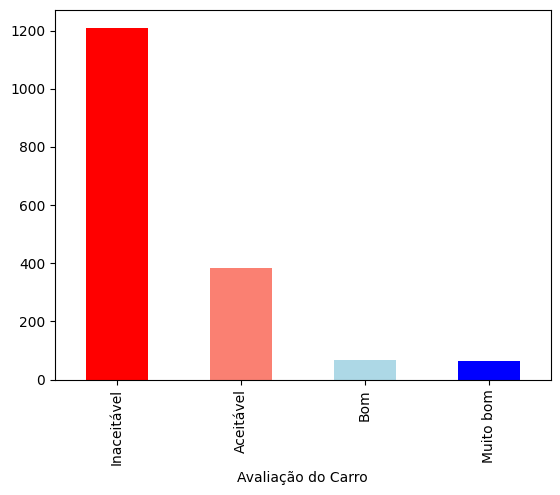

In [263]:
df["Avaliação do Carro"].value_counts().plot(kind="bar", color=["red" ,"salmon", "lightblue","blue"]);

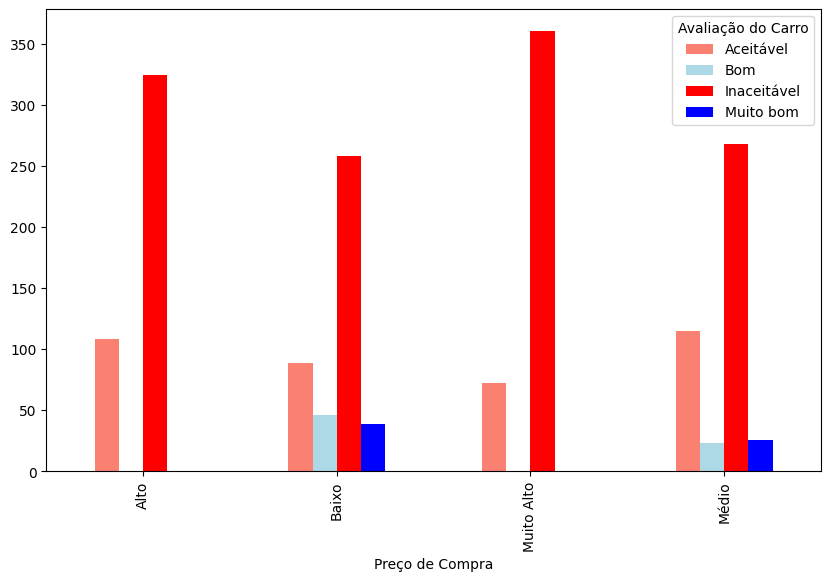

In [264]:
pd.crosstab(df["Preço de Compra"], df["Avaliação do Carro"]).plot(
    kind="bar", figsize=(10,6), color=["salmon", "lightblue", "red", "blue"]);

Criando os dummies das variáveis categóricas (todas)

In [265]:
df = pd.get_dummies(df, columns=['Preço de Compra', 'Preço de Manutenção', 'N° de Portas', 'Capacidade de Pessoas', 'Tamanho do Porta-malas', 'Segurança', 
                                 'Avaliação do Carro'],
                            prefix=['compra', 'mant', 'portas', 'pessoas', 'mala', 'sec', 'avl'], prefix_sep='_')

df = df.astype(int)

display(df)

,compra_Alto,compra_Baixo,compra_Muito Alto,compra_Médio,mant_Alto,mant_Baixo,mant_Muito Alto,mant_Médio,portas_2,portas_3,...,mala_Grande,mala_Médio,mala_Pequeno,sec_Alto,sec_Baixo,sec_Médio,avl_Aceitável,avl_Bom,avl_Inaceitável,avl_Muito bom
0,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,1,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1724,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


Iniciando análise exploratória dos dados

<Axes: >

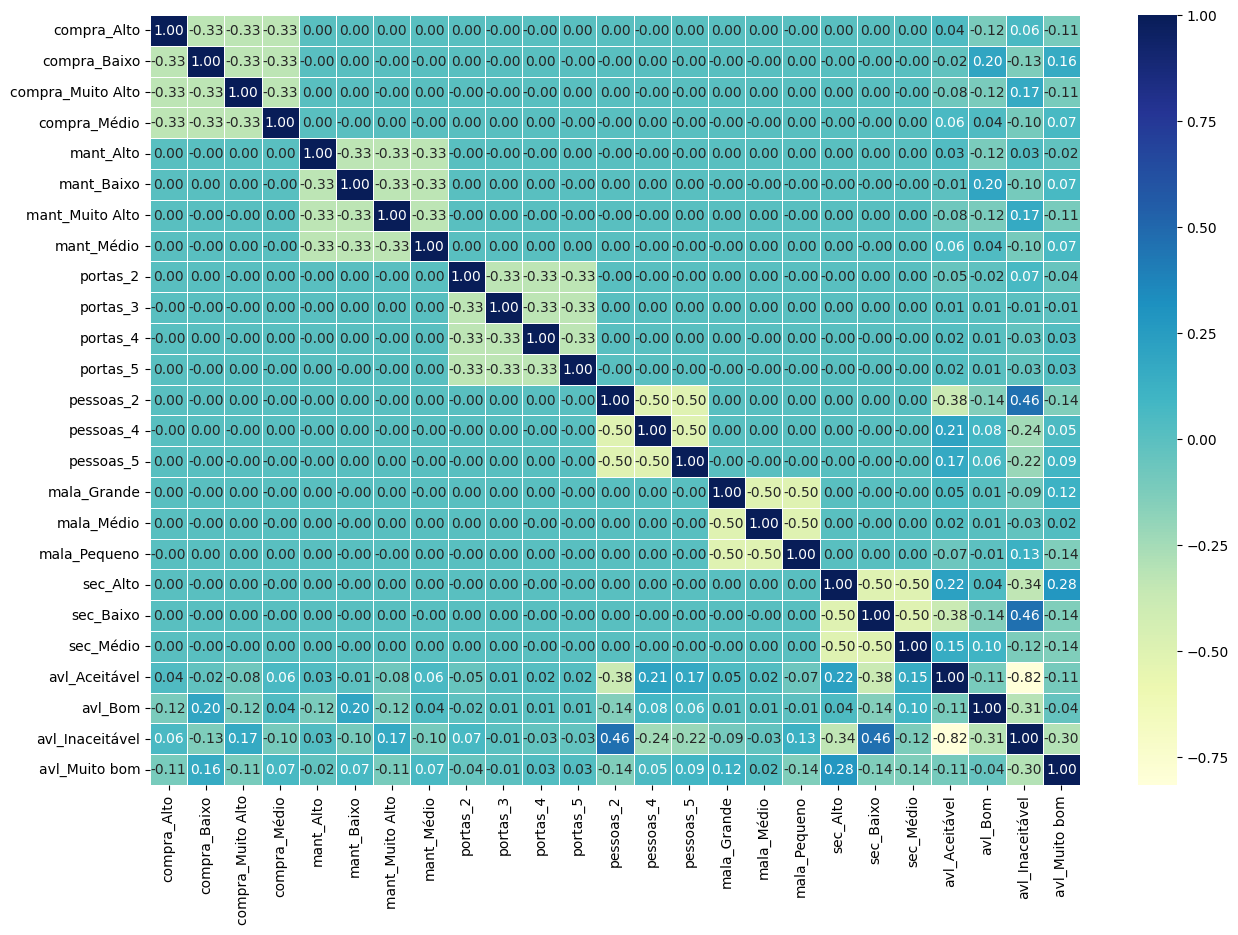

In [266]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu")